Importing Dependencies

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer

Data Colleciton

In [ ]:
# loading dataset to Pandas DataFram
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
# number of rows and columns in dataset
wine_dataset.shape

(1599, 12)

In [ ]:
# View first 5 rows of dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Check for missing values in dataset
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Data Analysis and visualisation**

In [ ]:
# Statistical measures of dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Correlation

Trying to find negative or postive correlation

In [ ]:
#Find the corrrelation vlaues using the corr function
correlation = wine_dataset.corr()

<Axes: >

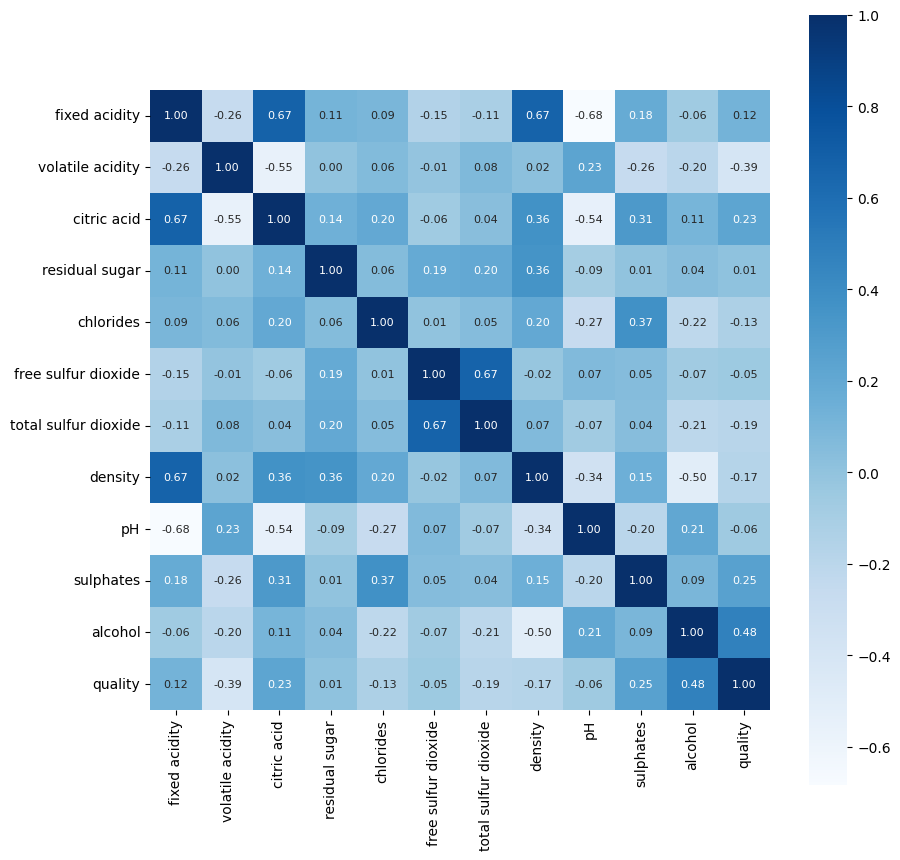

In [ ]:
#Construction a heatmap to undestand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

<Axes: xlabel='quality', ylabel='volatile acidity'>

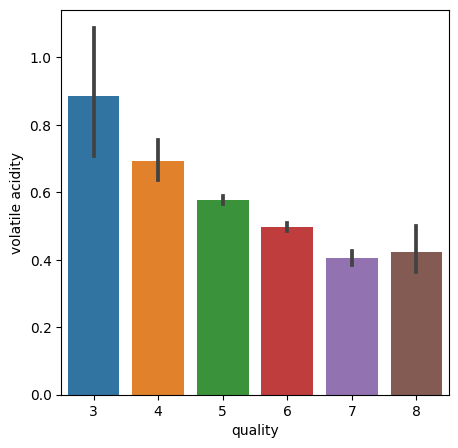

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

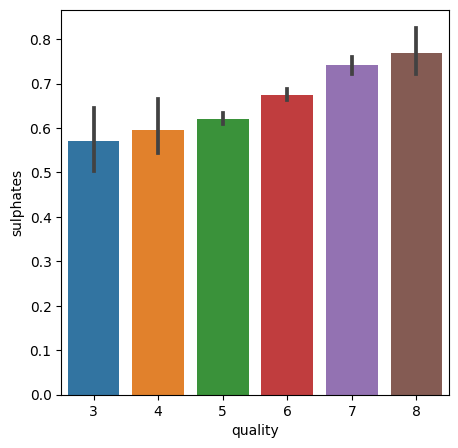

In [62]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

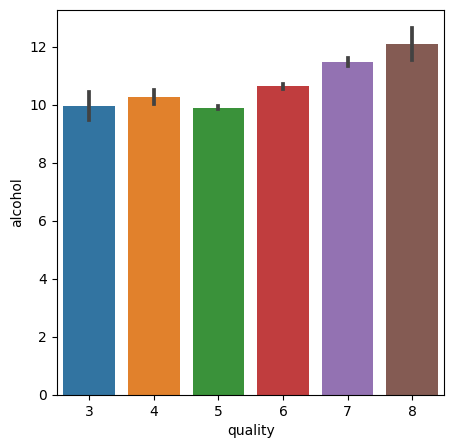

In [ ]:
# alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_dataset)

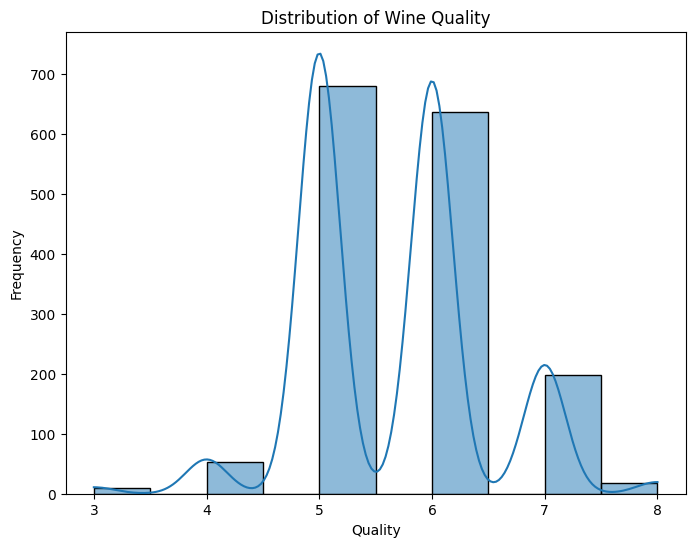

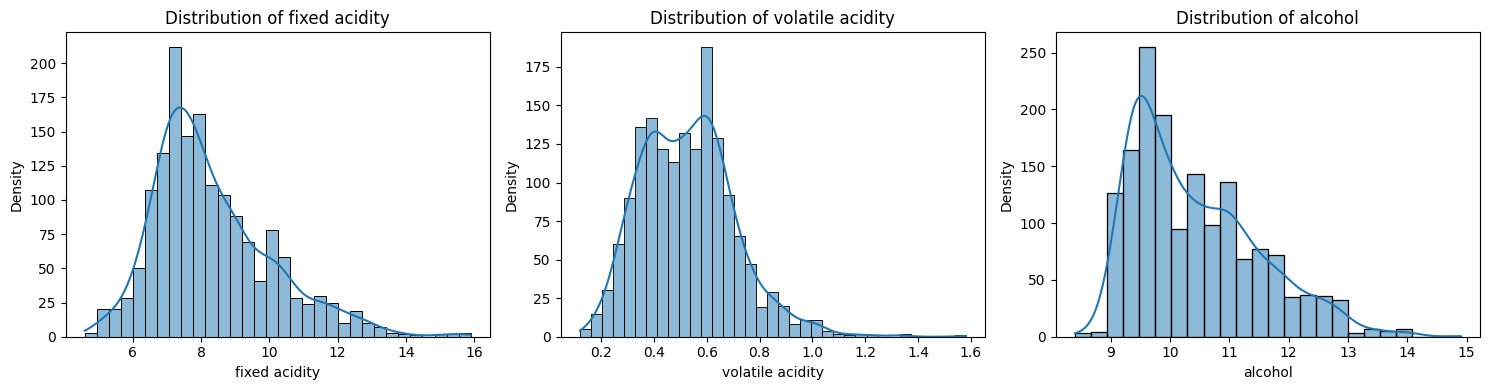

In [ ]:
# Histogram of the target variable (Wine Quality)
plt.figure(figsize=(8, 6))
sns.histplot(wine_dataset['quality'], kde=True, bins=10)  # Adjust bins for better visualization
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

# Histograms/Density Plots for a few input features (e.g., 'fixed acidity', 'volatile acidity', 'alcohol')
features_to_plot = ['fixed acidity', 'volatile acidity', 'alcohol']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.histplot(wine_dataset[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

1. Multilayer Perceptron
2. Convolutional Neural Network - Image and Video
3. Random Forest
4. Gradient Boosted Decision Trees



**Data Preprocessing**

In [ ]:
# Seperate the data and Label
# When dropping a column we neeed to mention the axis is 1 otherwise as a row it would be 0
X = wine_dataset.drop('quality', axis=1)

Label Binarization


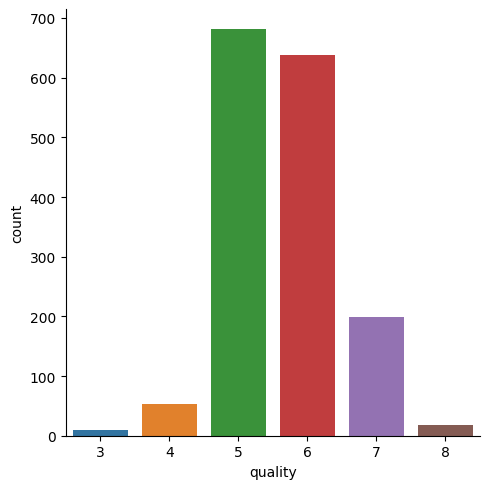

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Training and Test Split


1.   X_train: This holds the features used for training the machine learning model.
2.   X_test: This contains the features used for testing the trained model's Performance
3. Y_train: This holds the corresponding target values for the training set
4. Y_test: This contains the target values for the testing set.


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

In [56]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:

Random Forest Classifier

In [57]:
model = RandomForestClassifier()

In [58]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuraacy Score

In [59]:
# accuracy on test data
X_test_prediciton = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediciton, Y_test)

In [60]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.925


In [43]:
# Define the model
model = RandomForestClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt'],
    'random_state': [3]
}

# Create the Randomized Search Cross Validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=3)

# Fit the model
random_search.fit(X_train, Y_train)

# Best parameters found
print(random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'random_state': 3, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [61]:
model = RandomForestClassifier(n_estimators = 300, min_samples_split = 2, max_depth= 10, min_samples_leaf = 1, max_features = 'auto',  random_state=4)

model.fit(X_train, Y_train)

# accuracy on train data
X_train_prediciton = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediciton, Y_train)



print('Train Accuracy : ', train_data_accuracy)


# accuracy on test data
X_test_prediciton = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediciton, Y_test)



print('Test Accuracy : ', test_data_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Accuracy :  0.9960906958561376
Test Accuracy :  0.934375


Building a predictive system

In [45]:
# Input a random wines values whos quality value is 7
input_data = (7.3, 0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')



[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Conclusion**

* Very high level of accurecy when it comes to Training Accuracy and good Accuracy when it comes to training data
* When trying different states, models with no parameters ended up being better in some cases compared to the fine tuned model

This might be dues toi Data suitibility, Overfiting, Limited search, complex interactios, choices of metrics or Randomness in Algorithm